<a href="https://colab.research.google.com/github/farukemrekaraca/ztm-tensorflow-machinelearning-deeplearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


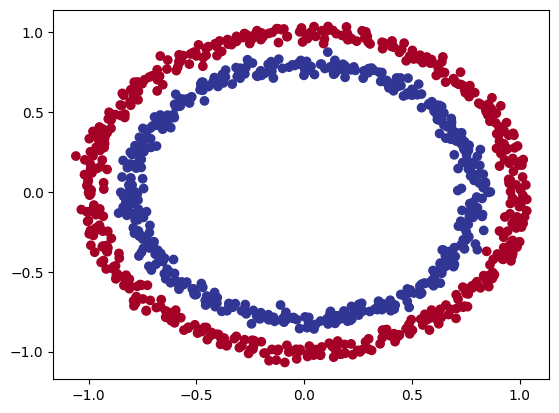

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2458 - accuracy: 0.5090
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.0847 - accuracy: 0.5020
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.7527 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9283 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4570
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5150
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4760
Epoch 11/

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932282447814941, 0.5]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.5080


[0.7005623579025269, 0.5080000162124634]

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
binary classification


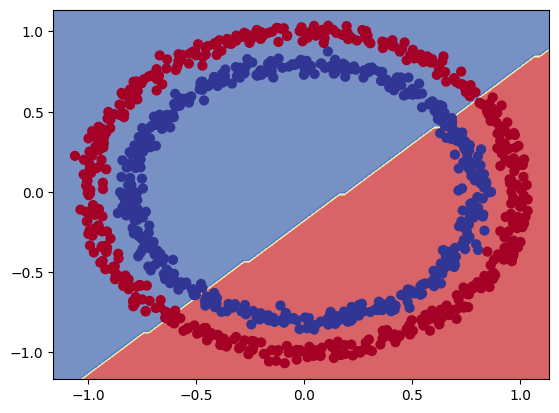

In [ ]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data

## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+

## After TensorFlow 2.7.0
model_5.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100,
            verbose=0)

2/2 [==============================] - 0s 5ms/step


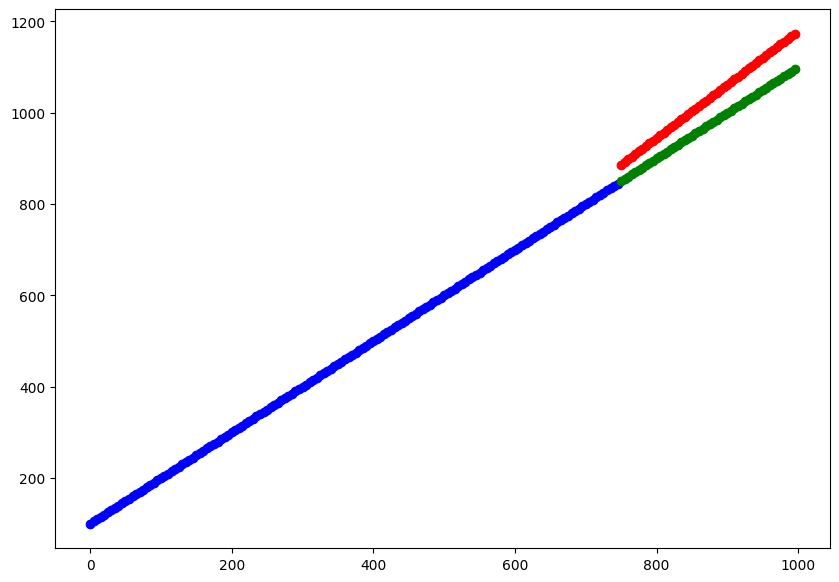

In [ ]:
y_reg_preds = model_5.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(2, activation="tanh")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.03),
                metrics=["accuracy"])

model_6.fit(X, y, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step
multiclass classification


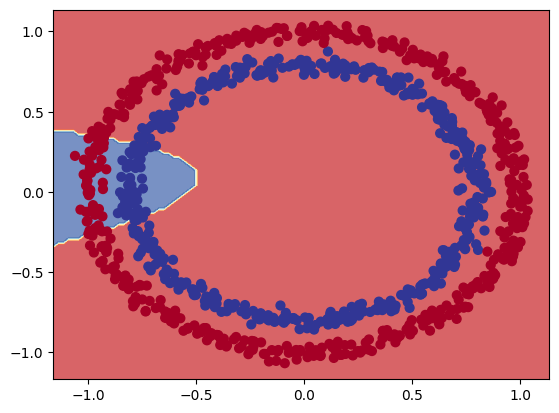

In [ ]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5030
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5140
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5160
Epoch 11/

313/313 [==============================] - 1s 2ms/step
binary classification


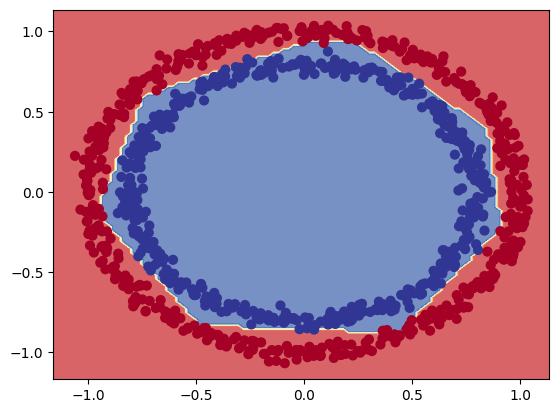

In [ ]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

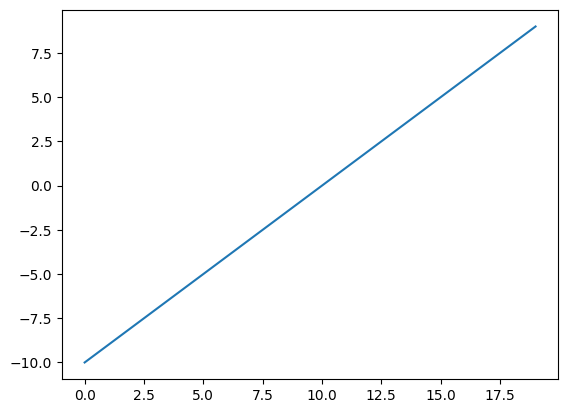

In [ ]:
plt.plot(A);

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

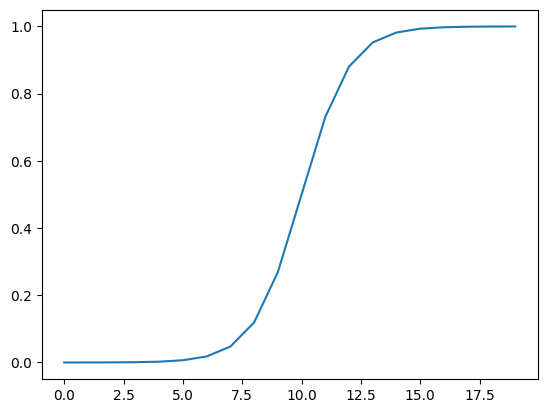

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
def relu(x):
  return tf.maximum(0, x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

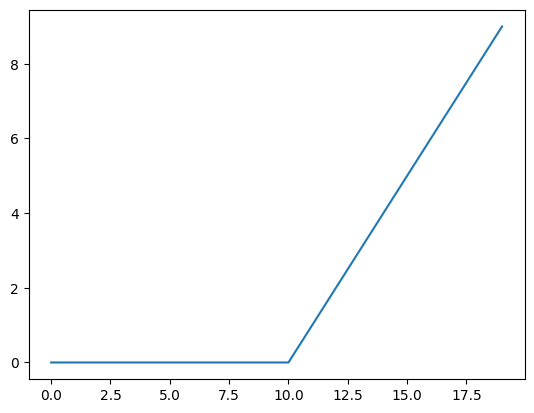

In [ ]:
plt.plot(relu(A))

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_8 = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6857 - accuracy: 0.5700
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5962
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6212
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6988
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.7325
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5925 - accuracy: 0.7325
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.8900
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.9262
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.9787
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.9925
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0481 - accuracy: 0.9950


[0.04808061942458153, 0.9950000047683716]

313/313 [==============================] - 1s 3ms/step
binary classification


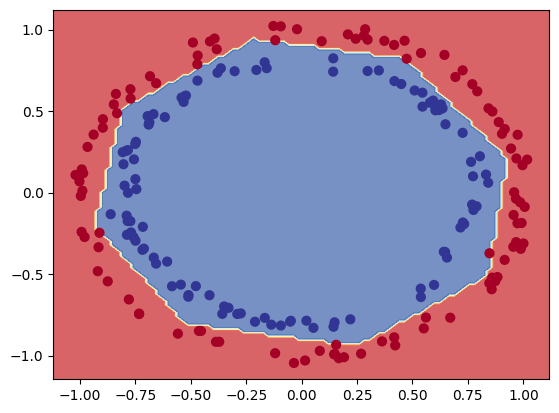

In [ ]:
plot_decision_boundary(model=model_8, X=X_test, y=y_test)

313/313 [==============================] - 1s 2ms/step
binary classification
313/313 [==============================] - 1s 2ms/step
binary classification


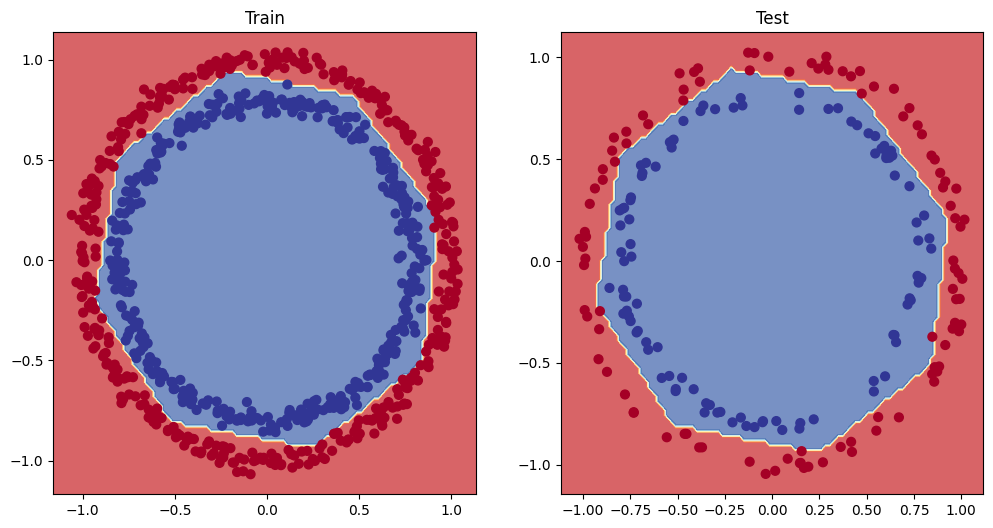

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [ ]:
history_8.history

{'loss': [0.6857485771179199,
  0.6771238446235657,
  0.6668543815612793,
  0.6508051156997681,
  0.6280660033226013,
  0.5925005078315735,
  0.5369237661361694,
  0.4715457260608673,
  0.3953211307525635,
  0.3145378530025482,
  0.25059378147125244,
  0.2017451673746109,
  0.16265441477298737,
  0.1397637575864792,
  0.11597491055727005,
  0.10171914100646973,
  0.08906879276037216,
  0.07995304465293884,
  0.07312684506177902,
  0.06610023975372314,
  0.05803501233458519,
  0.055194176733493805,
  0.05008704587817192,
  0.04554775357246399,
  0.046095047146081924],
 'accuracy': [0.5699999928474426,
  0.5962499976158142,
  0.6212499737739563,
  0.6987500190734863,
  0.7325000166893005,
  0.7325000166893005,
  0.8899999856948853,
  0.9262499809265137,
  0.9787499904632568,
  0.9925000071525574,
  0.9900000095367432,
  0.9900000095367432,
  0.9975000023841858,
  0.9912499785423279,
  0.9937499761581421,
  0.9937499761581421,
  0.9950000047683716,
  0.9962499737739563,
  0.99750000238418

In [ ]:
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.685749,0.57000
1,0.677124,0.59625
2,0.666854,0.62125
3,0.650805,0.69875
4,0.628066,0.73250
5,0.592501,0.73250
6,0.536924,0.89000
7,0.471546,0.92625
8,0.395321,0.97875
9,0.314538,0.99250


Text(0.5, 1.0, 'Model_8 loss curves')

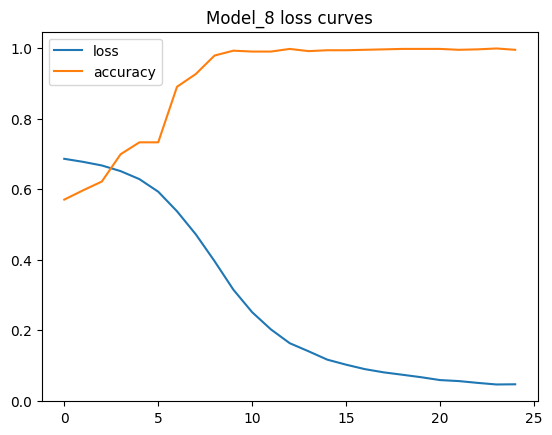

In [ ]:
pd.DataFrame(history_8.history).plot()
plt.title("Model_8 loss curves")

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.4875 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4875 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.4875 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

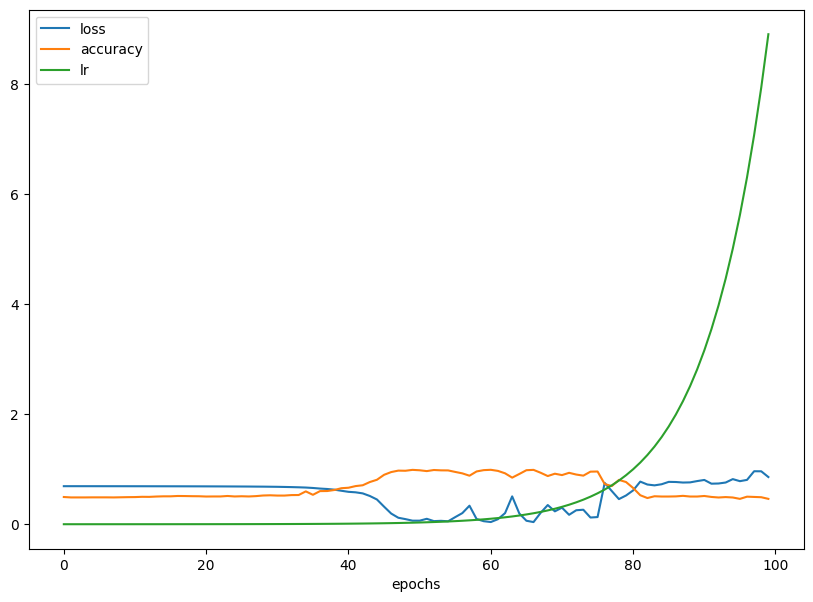

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

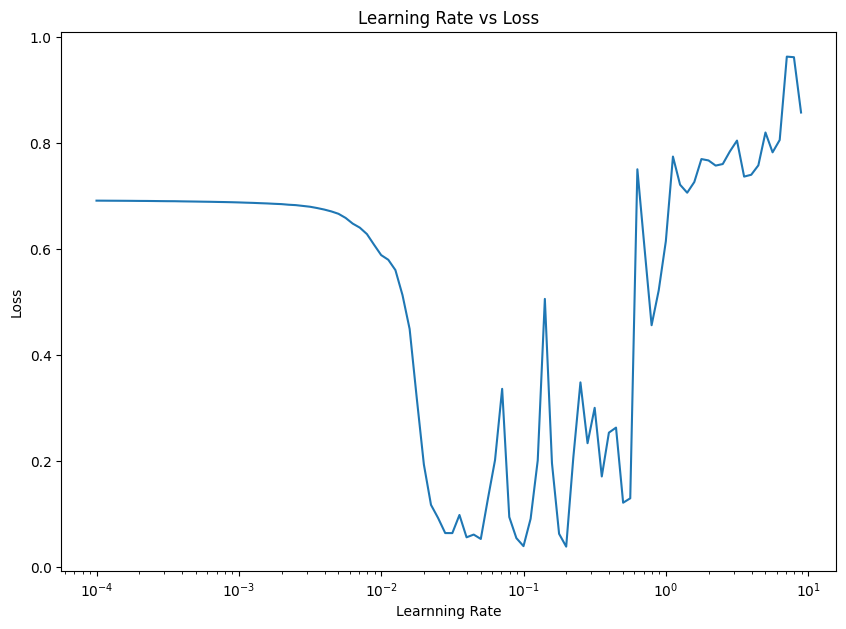

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learnning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0158),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=60)

Epoch 1/60
25/25 [==============================] - 1s 3ms/step - loss: 0.6958 - accuracy: 0.4712
Epoch 2/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5325
Epoch 3/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5288
Epoch 4/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5700
Epoch 5/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.5612
Epoch 6/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6037
Epoch 7/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.6363
Epoch 8/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.6525
Epoch 9/60
25/25 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7013
Epoch 10/60
25/25 [==============================] - 0s 5ms/step - loss: 0.5631 - accuracy: 0.7038
Epoch 11/60
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.8500


[0.2843082547187805, 0.8500000238418579]

Text(0.5, 1.0, 'Model_10 loss curves')

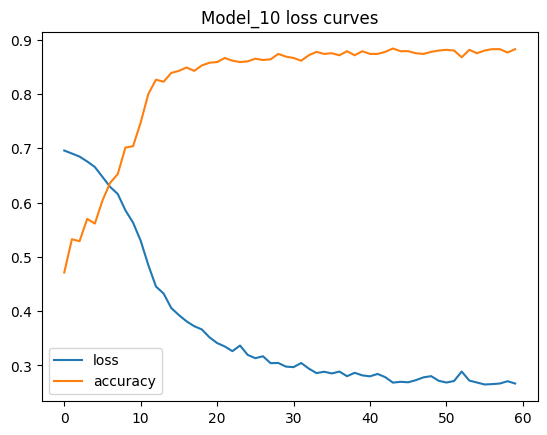

In [ ]:
pd.DataFrame(history_10.history).plot()
plt.title("Model_10 loss curves")

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_11 = model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 14ms/step - loss: 0.6829 - accuracy: 0.5425
Epoch 2/20
25/25 [==============================] - 0s 16ms/step - loss: 0.6701 - accuracy: 0.5925
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.6037
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6304 - accuracy: 0.6500
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6166 - accuracy: 0.6450
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.5960 - accuracy: 0.6662
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5777 - accuracy: 0.6875
Epoch 8/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5717 - accuracy: 0.6862
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5531 - accuracy: 0.7038
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.7038
Epoch 11/20
25/2

Text(0.5, 1.0, 'Model_11 loss curves')

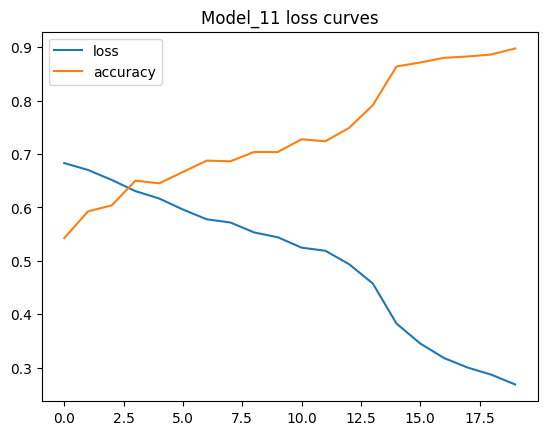

In [ ]:
pd.DataFrame(history_11.history).plot()
plt.title("Model_11 loss curves")

In [ ]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.8750


[0.28866082429885864, 0.875]

313/313 [==============================] - 2s 4ms/step
binary classification
313/313 [==============================] - 1s 2ms/step
binary classification


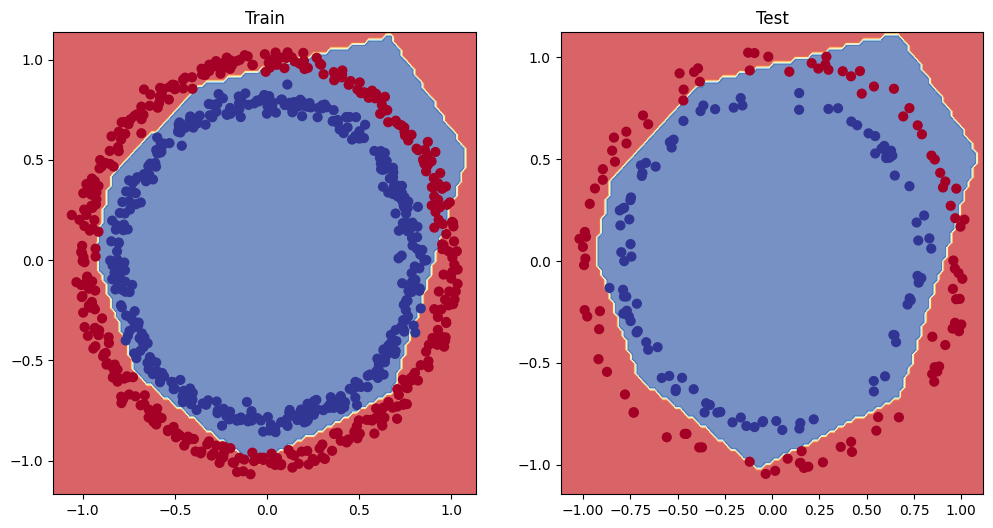

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_preds_11 = model_11.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds_11))

7/7 [==============================] - 0s 4ms/step


array([[76, 25],
       [ 0, 99]])

In [ ]:
import itertools

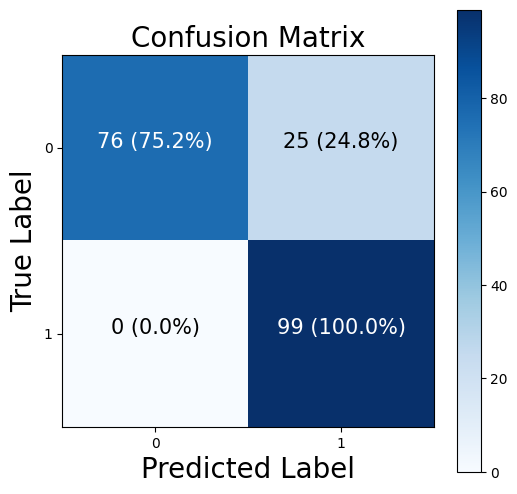

In [ ]:
figsize = (6, 6)

cm = confusion_matrix(y_test, tf.round(y_preds_11))

cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes :
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = ((cm.max() + cm.min()) / 2)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment ="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

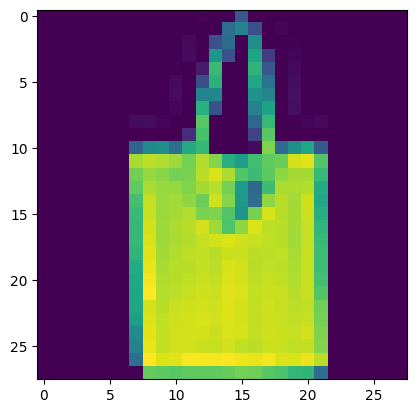

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[14131]);

In [ ]:
train_labels[14131]

8

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Pullover')

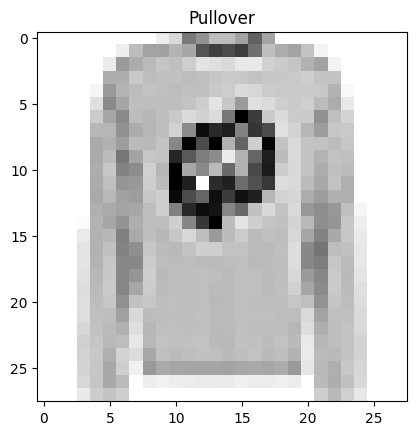

In [ ]:
chosen_index = 123
plt.imshow(train_data[chosen_index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[chosen_index]])

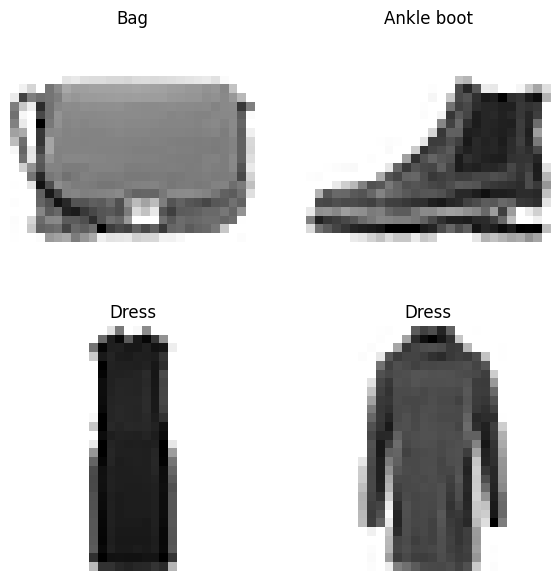

In [ ]:
import random
plt.figure(figsize=(7, 7))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# input shape
train_data[0].shape

(28, 28)

In [ ]:
# output shape
len(class_names)

10

In [ ]:
tf.random.set_seed(42)

fashion_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

non_norm_history = fashion_model.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4071 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3040 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1846 - accuracy: 0.1467 - val_loss: 2.0926 - val_accuracy: 0.2279
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9175 - accuracy: 0.2444 - val_loss: 1.7962 - val_accuracy: 0.2944
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6355 - accuracy: 0.3231 - val_loss: 1.5696 - val_accuracy: 0.3469
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5004 - accuracy: 0.3443 - val_loss: 1.4804 - val_accuracy

KeyboardInterrupt: 

In [ ]:
fashion_model.summary()

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
tf.random.set_seed(42)

fashion_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

norm_history = fashion_model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

NameError: name 'non_norm_history' is not defined

In [ ]:
tf.random.set_seed(42)

fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history = fashion_model_3.fit(train_data_norm,
                                      train_labels,
                                      epochs=40,
                                      validation_data=(test_data_norm, test_labels),
                                      callbacks=[lr_scheduler])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10 ** (tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# between 0.001 and 0.01
# let's try 0.005

tf.random.set_seed(42)

fashion_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                      metrics=["accuracy"])

history_4 = fashion_model_4.fit(train_data_norm,
                                      train_labels,
                                      epochs=20,
                                      validation_data=(test_data_norm, test_labels))

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# let's try 0.001

tf.random.set_seed(42)

fashion_model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics=["accuracy"])

history_5 = fashion_model_5.fit(train_data_norm,
                                      train_labels,
                                      epochs=20,
                                      validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2962 - accuracy: 0.5907 - val_loss: 0.9018 - val_accuracy: 0.7414
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7929 - accuracy: 0.7621 - val_loss: 0.7620 - val_accuracy: 0.7592
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6982 - accuracy: 0.7786 - val_loss: 0.7126 - val_accuracy: 0.7692
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6640 - accuracy: 0.7822 - val_loss: 0.6817 - val_accuracy: 0.7787
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6470 - accuracy: 0.7852 - val_loss: 0.6723 - val_accuracy: 0.7757
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6340 - accuracy: 0.7866 - val_loss: 0.6614 - val_accuracy: 0.7811
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6270 - accuracy: 0.7883 - val_loss: 0.6593 - val_accuracy:

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes :
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = ((cm.max() + cm.min()) / 2)

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment ="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_probs = fashion_model_5.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.38430145e-09, 3.14375114e-16, 1.07769974e-10, 5.65525144e-12,
        2.27342298e-07, 3.12828034e-01, 4.06405405e-07, 6.07583448e-02,
        3.13692586e-03, 6.23275995e-01],
       [9.19188242e-05, 8.44901794e-20, 8.08960557e-01, 2.98818850e-05,
        9.06345341e-03, 7.67091897e-18, 1.81852162e-01, 0.00000000e+00,
        2.05315723e-06, 4.20712296e-31],
       [4.90501011e-03, 9.42970753e-01, 4.01351717e-04, 4.39157858e-02,
        6.14831632e-04, 5.01166331e-03, 1.11707486e-03, 9.54966352e-04,
        1.05505227e-04, 3.09595339e-06],
       [4.90501011e-03, 9.42970753e-01, 4.01351717e-04, 4.39157858e-02,
        6.14831632e-04, 5.01166331e-03, 1.11707486e-03, 9.54966352e-04,
        1.05505227e-04, 3.09595339e-06],
       [1.08967572e-01, 1.27575186e-06, 2.43590355e-01, 4.57009450e-02,
        3.53152640e-02, 9.11135487e-07, 5.62415183e-01, 1.91593062e-17,
        4.00840957e-03, 4.11927816e-13]], dtype=float32)

In [ ]:
y_probs[0], class_names[tf.argmax(y_probs[0])]

(array([1.38430145e-09, 3.14375114e-16, 1.07769974e-10, 5.65525144e-12,
        2.27342298e-07, 3.12828034e-01, 4.06405405e-07, 6.07583448e-02,
        3.13692586e-03, 6.23275995e-01], dtype=float32),
 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)

for i in range (10):
  print(class_names[y_preds[i]])

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker


Text(0.5, 1.0, 'Sandal')

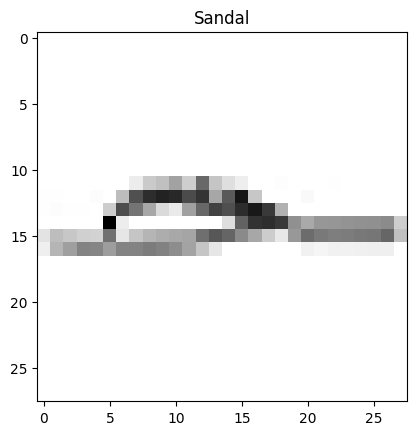

In [ ]:
chosen_index = 8
plt.imshow(test_data[chosen_index], cmap=plt.cm.binary)
plt.title(class_names[test_labels[chosen_index]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[771,  12,  17,  91,   2,   1,  93,   1,  12,   0],
       [  5, 937,   3,  46,   2,   1,   5,   0,   1,   0],
       [ 22,   1, 546,  69, 190,   1, 170,   0,   1,   0],
       [ 31,  49,  16, 826,  34,   2,  40,   0,   2,   0],
       [  2,   0,  61,  73, 742,   2, 116,   0,   4,   0],
       [  1,   0,   0,   0,   0, 904,   0,  49,   4,  42],
       [165,   7,  85,  76, 126,   5, 515,   0,  21,   0],
       [  0,   0,   0,   0,   0,  44,   0, 897,   0,  59],
       [  9,   1,   0,   4,   5,  20,  49,   5, 904,   3],
       [  0,   0,   0,   0,   0,  44,   0,  53,   1, 902]])

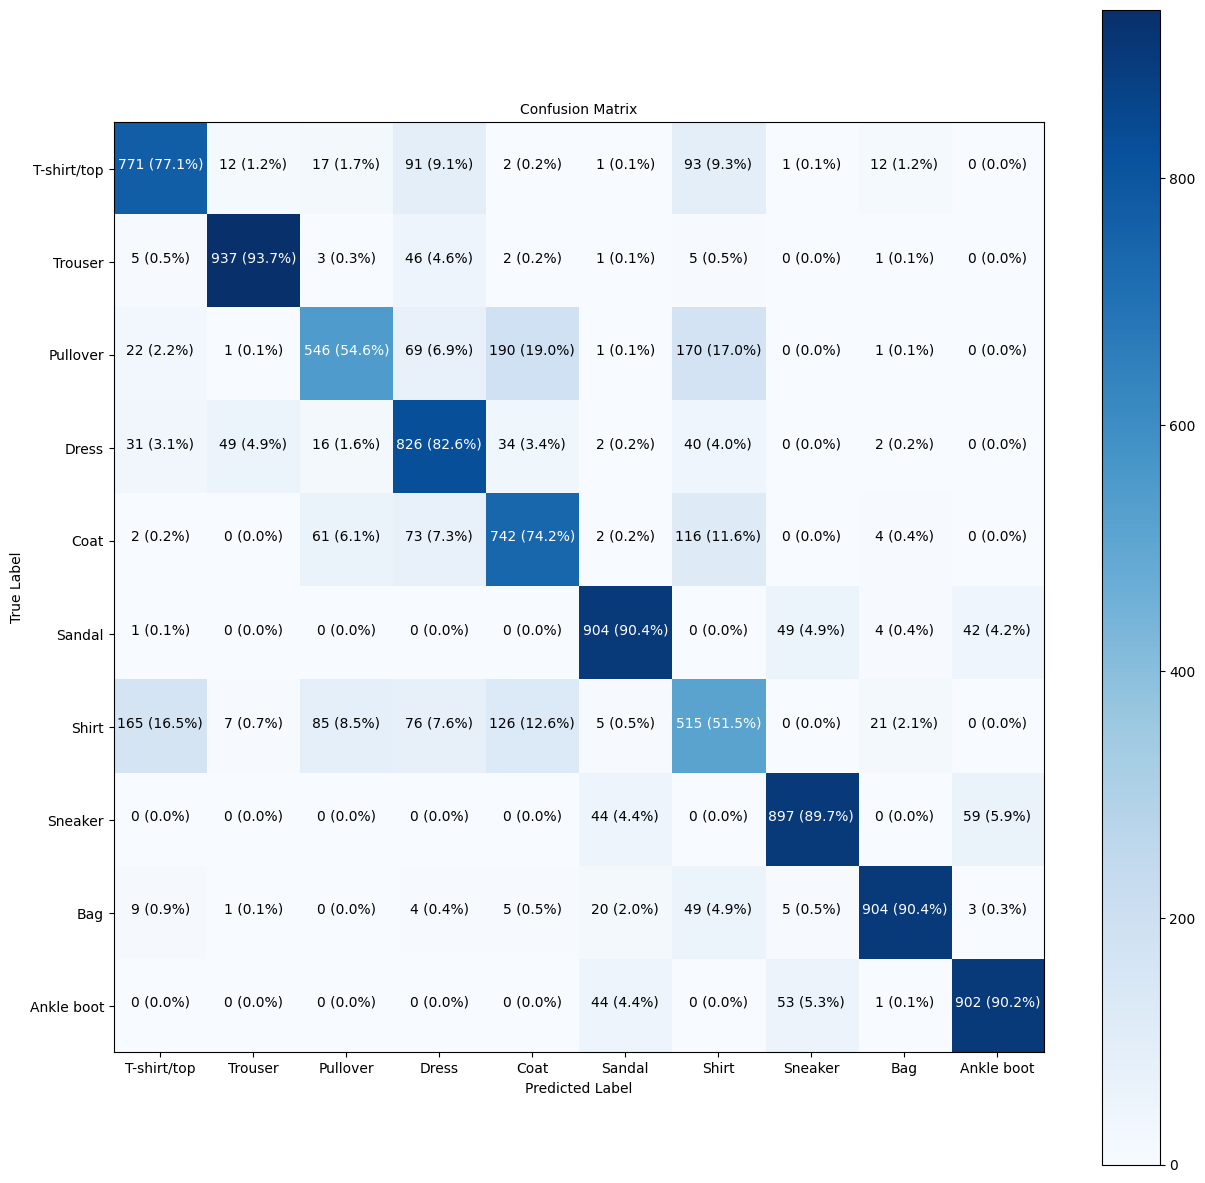

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  pick random image, plot it, label it
  """
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 22ms/step


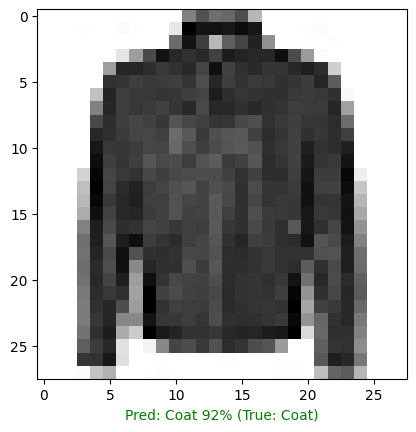

In [ ]:
plot_random_image(model=fashion_model_5,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
fashion_model_5.layers

In [ ]:
fashion_model_5.layers[1]

In [ ]:
weights, biases = fashion_model_5.layers[1].get_weights()

weights, weights.shape

(array([[-0.5972057 , -0.02331812,  0.20287311, -0.2802503 ],
        [ 0.1675085 , -0.019247  , -0.6378585 , -0.41566464],
        [ 0.34177846, -0.02328039,  0.56687534, -1.0476097 ],
        ...,
        [-0.47955257, -0.03368716,  0.30792183, -0.04347595],
        [-1.2941756 , -0.08117761, -0.15511212,  0.13811502],
        [-0.6172417 , -0.0566768 ,  0.15220319, -0.09303569]],
       dtype=float32),
 (784, 4))

In [ ]:
biases, biases.shape

(array([ 1.5189127 , -0.02907957,  2.457651  ,  1.4856417 ], dtype=float32),
 (4,))

In [ ]:
fashion_model_5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


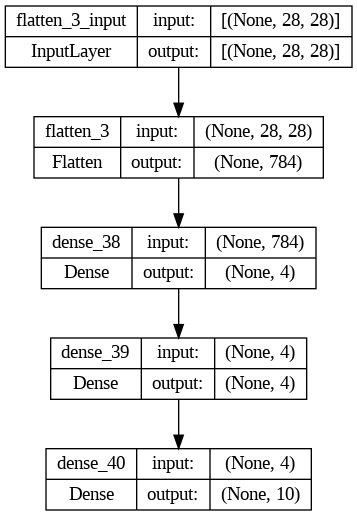

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(fashion_model_5, show_shapes=True)